In [1]:
import pandas as pd

import sys
sys.path.insert(0, '..')

from gsea.single_sample_gsea import single_sample_gsea
from gsea.single_sample_gseas import single_sample_gseas
from gsea.gsea import gsea

%load_ext autoreload
%autoreload 2
%matplotlib inline

# Read gene-x-sample

In [2]:
gene_x_sample = pd.read_table('gene_x_sample.tsv', index_col=0)

gene_x_sample

,C_1_tpm,C_2_tpm,C_3_tpm,VS_1_tpm,VS_2_tpm,VS_3_tpm
A1BG,16.019900,21.366800,27.778300,23.046700,27.639300,27.871400
A1CF,0.013441,0.007602,0.000000,0.000000,0.007966,0.000000
A2M,80.521500,71.333800,75.847100,80.079200,77.568900,77.939000
A2ML1,0.038801,0.043933,0.020363,0.031925,0.062238,0.000000
A2MP1,0.000000,0.000000,0.000000,0.030988,0.000000,0.196262
A3GALT2,0.000000,0.000000,0.000000,0.079106,0.000000,0.000000
A4GALT,0.000000,0.066444,0.226437,0.058269,0.000000,0.109872
A4GNT,0.040052,0.000000,0.041854,0.000000,0.047331,0.000000
AAAS,31.455400,28.881000,28.672600,31.016200,32.744000,30.830100
AACS,4.310470,3.741810,4.402040,4.129580,4.043400,4.122380


# Read gene sets

In [3]:
gene_sets = pd.read_table('gene_sets.tsv', index_col=0)

gene_sets

,Gene 0,Gene 1,Gene 2,Gene 3,Gene 4,Gene 5,Gene 6,Gene 7,Gene 8,Gene 9,...,Gene 2930,Gene 2931,Gene 2932,Gene 2933,Gene 2934,Gene 2935,Gene 2936,Gene 2937,Gene 2938,Gene 2939
Gene Set,,,,,,,,,,,,,,,,,,,,,
GO_14_3_3_PROTEIN_BINDING,AANAT,AKT1,ARRB2,BAD,DAB2IP,DDIT4,HDAC7,IRS2,KCNH1,KIF13B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ONGUSAHA_TP53_TARGETS,AK1,ANXA8L2,APOBEC1,CCNG1,CDKN1A,COL18A1,CSRP2,CTSF,CTSH,DDIT4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GO_NEURON_CELL_CELL_ADHESION,ASTN1,CDK5R1,CEL,CNTN4,NCAM2,NINJ2,NLGN1,NLGN2,NLGN3,NLGN4X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GO_SH2_DOMAIN_BINDING,AFAP1L2,ARHGAP5,CRK,CTR9,DAG1,DLC1,GNB2L1,INPPL1,IRS1,JAK2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YAP signature based on cell NIH3T3_MCD10A in paper GENES & DEVELOPMENT 22:1962–1971 2008,ALCAM,AXL,C6orf173,CCND1,CENPA,CTGF,CYR61,DTL,DUSP6,EGR1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YAP signature based on mechanism,AMOTL2,CCND1,CTGF,CYR61,DUSP6,TEAD4,TRIB3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BIOCARTA_RHO_PATHWAY,ACTR2,ACTR3,ARHGAP1,ARHGAP4,ARHGAP5,ARHGAP6,ARHGEF1,ARHGEF11,ARHGEF5,ARPC1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VANTVEER_BREAST_CANCER_BRCA1_UP,ART3,ATAD3A,C1orf38,CCL2,CD19,DENND1B,DNTTIP2,EEF1D,EML4,GLMN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"YAP signature based on cell HEK293 in paper Cell 150, 780–791, August 17, 2012",ANKRD1,AOMTL2,CTGF,CYR61,EDN1,EGR3,EGR4,PPP1R3B,TAGLN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Run single-sample GSEA (1 sample & 1 gene set) (== pre-rank GSEA)

array(0.6027559399966737)

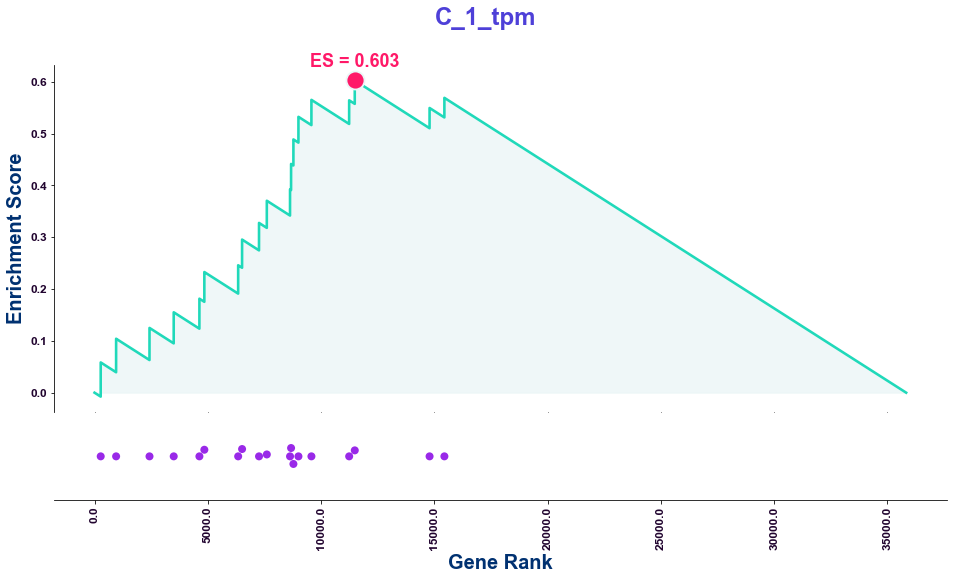

In [4]:
score = single_sample_gsea(
    gene_x_sample.iloc[:, 0],
    gene_sets.iloc[0],
    normalization_method='rank',
    power=1,
    statistic='ks',
    plot=True,
    plot_file_path='mountain_plot.png')

score

# Run single-sample GSEA (1 <= sample & 1 <= gene set)

In [5]:
score__gene_set_x_sample = single_sample_gseas(
    gene_x_sample,
    gene_sets,
    normalization_method='rank',
    power=1,
    statistic='ks',
    file_path='gene_set_x_sample.tsv')

score__gene_set_x_sample


(1/6) Running single-sample GSEA with C_1_tpm ...
	(1/9) Computing the enrichment of GO_14_3_3_PROTEIN_BINDING ...
	(2/9) Computing the enrichment of ONGUSAHA_TP53_TARGETS ...
	(3/9) Computing the enrichment of GO_NEURON_CELL_CELL_ADHESION ...
	(4/9) Computing the enrichment of GO_SH2_DOMAIN_BINDING ...
	(5/9) Computing the enrichment of YAP signature based on cell NIH3T3_MCD10A in paper GENES & DEVELOPMENT 22:1962–1971 2008 ...
	(6/9) Computing the enrichment of YAP signature based on mechanism ...
	(7/9) Computing the enrichment of BIOCARTA_RHO_PATHWAY ...
	(8/9) Computing the enrichment of VANTVEER_BREAST_CANCER_BRCA1_UP ...
	(9/9) Computing the enrichment of YAP signature based on cell HEK293 in paper Cell 150, 780–791, August 17, 2012 ...

(2/6) Running single-sample GSEA with C_2_tpm ...
	(1/9) Computing the enrichment of GO_14_3_3_PROTEIN_BINDING ...
	(2/9) Computing the enrichment of ONGUSAHA_TP53_TARGETS ...
	(3/9) Computing the enrichment of GO_NEURON_CELL_CELL_ADHESION ...


,C_1_tpm,C_2_tpm,C_3_tpm,VS_1_tpm,VS_2_tpm,VS_3_tpm
Gene Set,,,,,,
GO_14_3_3_PROTEIN_BINDING,0.602756,0.611546,0.611176,0.624356,0.615042,0.611456
ONGUSAHA_TP53_TARGETS,0.557143,0.553502,0.532642,0.547047,0.548610,0.548528
GO_NEURON_CELL_CELL_ADHESION,0.448705,0.435126,0.439289,0.327090,0.316326,0.424090
GO_SH2_DOMAIN_BINDING,0.485671,0.480356,0.473279,0.489995,0.484973,0.482096
YAP signature based on cell NIH3T3_MCD10A in paper GENES & DEVELOPMENT 22:1962–1971 2008,0.530897,0.526387,0.530457,0.542299,0.540555,0.539292
YAP signature based on mechanism,0.764103,0.768179,0.768402,0.737585,0.730775,0.730607
BIOCARTA_RHO_PATHWAY,0.636011,0.635151,0.615490,0.626674,0.615976,0.607874
VANTVEER_BREAST_CANCER_BRCA1_UP,0.579176,0.555578,0.562140,0.552744,0.561404,0.547517
"YAP signature based on cell HEK293 in paper Cell 150, 780–791, August 17, 2012",0.406851,0.445383,0.437836,0.437514,0.495257,0.427421


# Run GSEA (1 <= sample & 1 <= gene set) and permute phenotype or gene to compute p-value

Computing log ratios ...
	array_1d_0_non_0_min = 1.12012e-09
	array_1d_1_non_0_min = 4.1190333333333334e-10
	normalization_factor = 1.0003522996282235
Computing log ratios ...
	array_1d_0_non_0_min = 4.1190333333333334e-10
	array_1d_1_non_0_min = 1.12012e-09
	normalization_factor = 1.0022968361204398
Computing log ratios ...
	array_1d_0_non_0_min = 9.065033333333333e-10
	array_1d_1_non_0_min = 4.1190333333333334e-10
	normalization_factor = 1.00371407463661
Computing log ratios ...
	array_1d_0_non_0_min = 4.1190333333333334e-10
	array_1d_1_non_0_min = 4.4847000000000006e-10
	normalization_factor = 0.9991192893193565
Computing log ratios ...
	array_1d_0_non_0_min = 1.12012e-09
	array_1d_1_non_0_min = 4.1190333333333334e-10
	normalization_factor = 0.9977084272466328
Computing log ratios ...
	array_1d_0_non_0_min = 4.1190333333333334e-10
	array_1d_1_non_0_min = 1.12012e-09
	normalization_factor = 0.9996478244430942
Computing log ratios ...
	array_1d_0_non_0_min = 4.1190333333333334e-10
	ar

,Score,P-Value
Gene Set,,
"YAP signature based on cell HEK293 in paper Cell 150, 780–791, August 17, 2012",0.438827,0.333333
ONGUSAHA_TP53_TARGETS,0.454438,0.333333
GO_SH2_DOMAIN_BINDING,0.467581,0.333333
YAP signature based on mechanism,0.477181,0.666667
GO_NEURON_CELL_CELL_ADHESION,0.483562,1.000000
YAP signature based on cell NIH3T3_MCD10A in paper GENES & DEVELOPMENT 22:1962–1971 2008,0.492138,0.333333
GO_14_3_3_PROTEIN_BINDING,0.492196,0.333333
VANTVEER_BREAST_CANCER_BRCA1_UP,0.515126,0.333333
BIOCARTA_RHO_PATHWAY,0.521097,0.333333


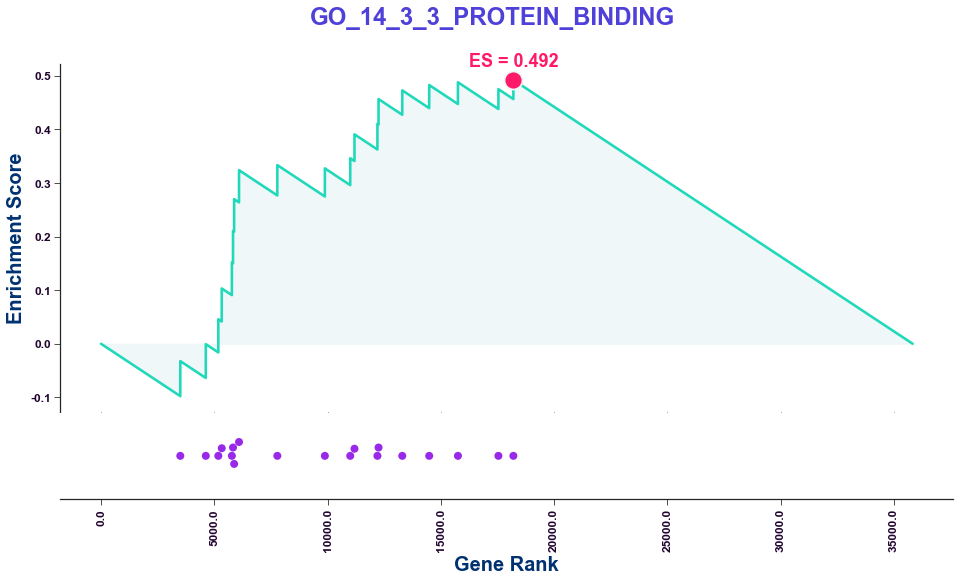

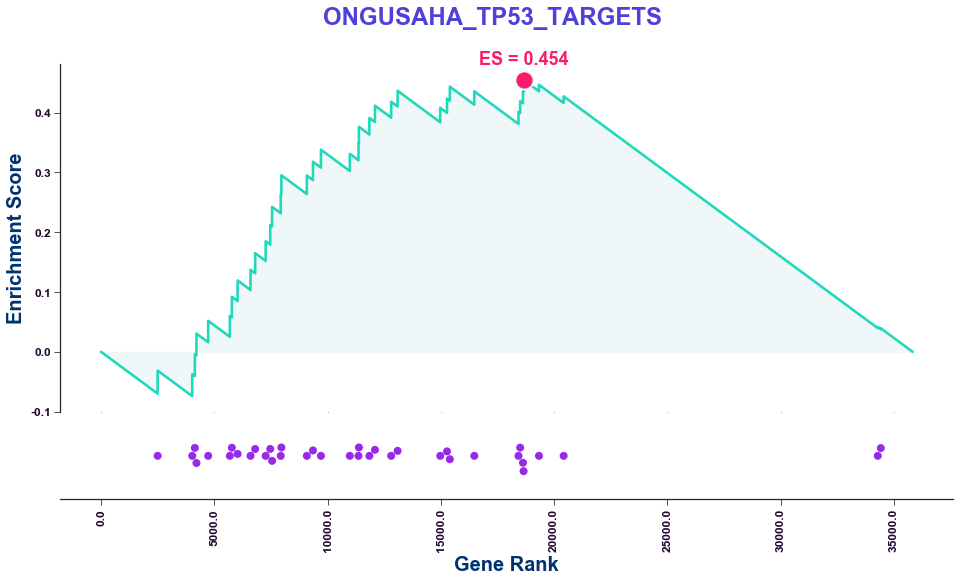

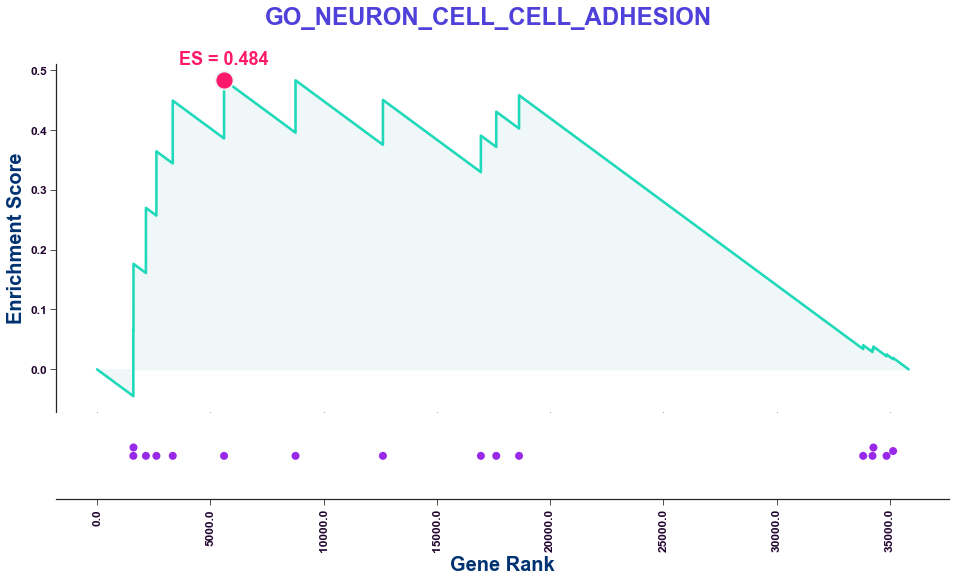

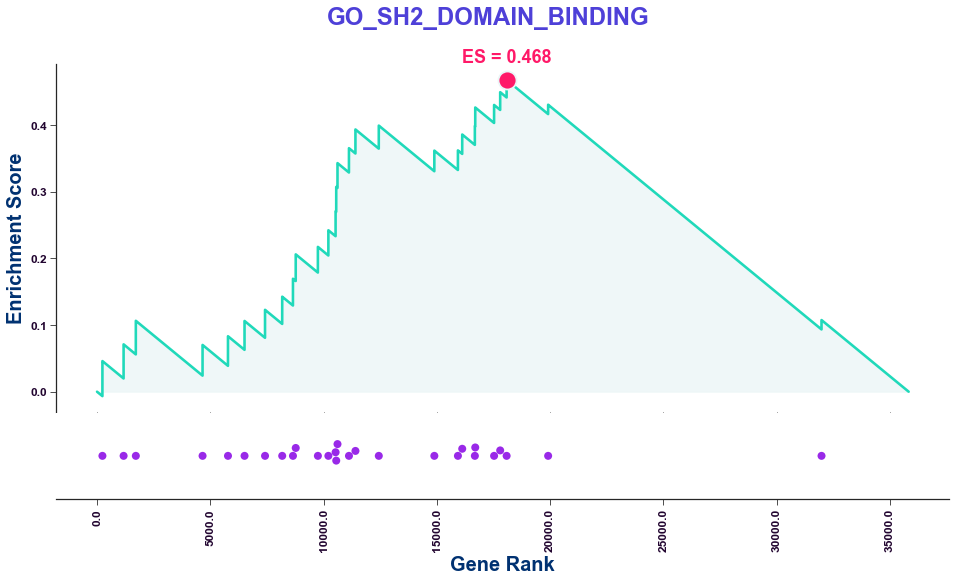

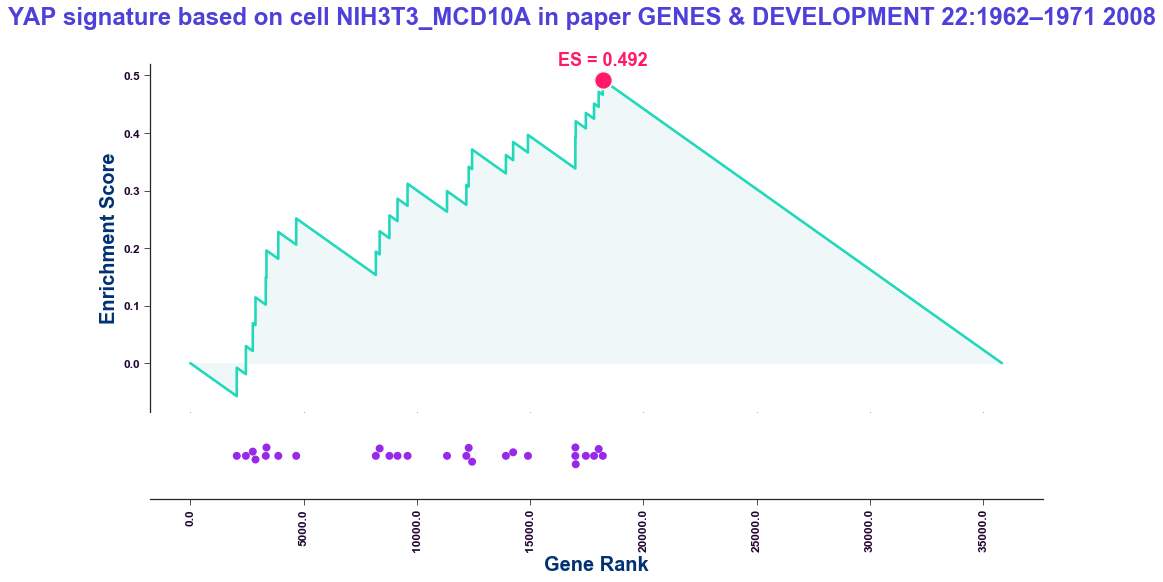

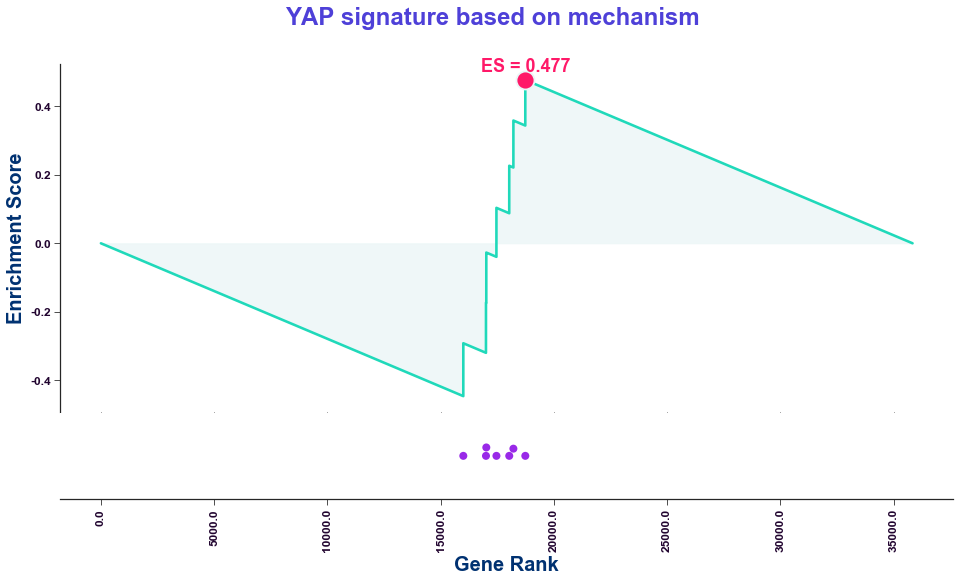

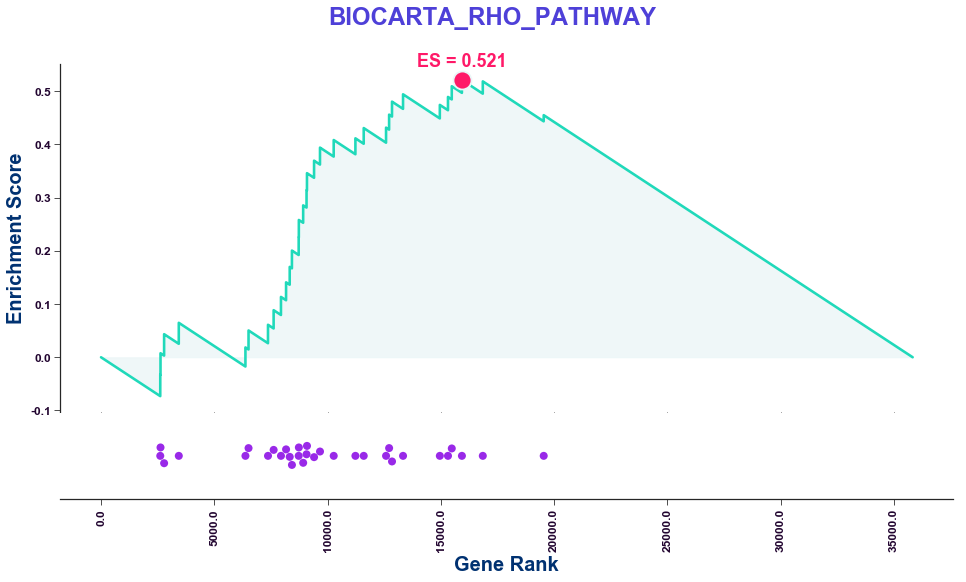

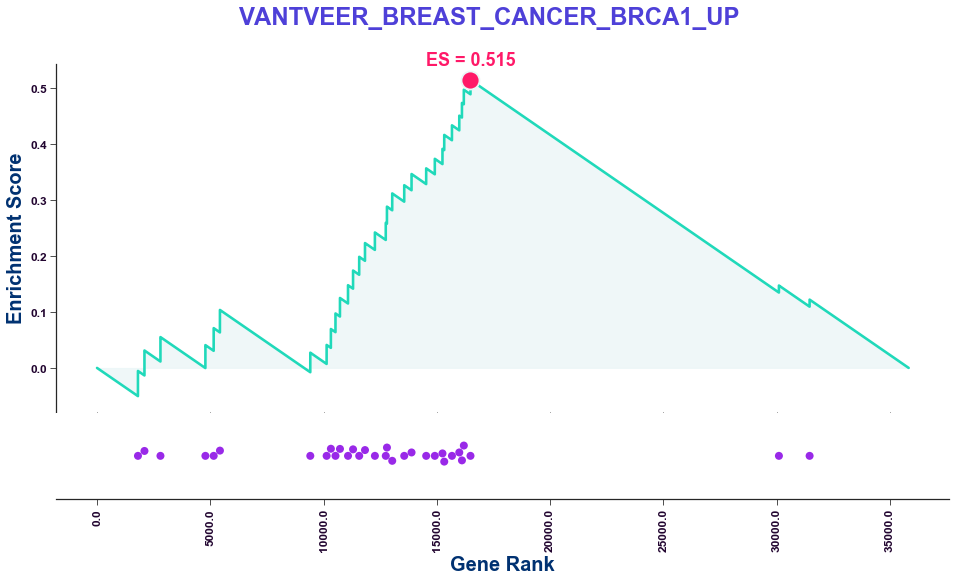

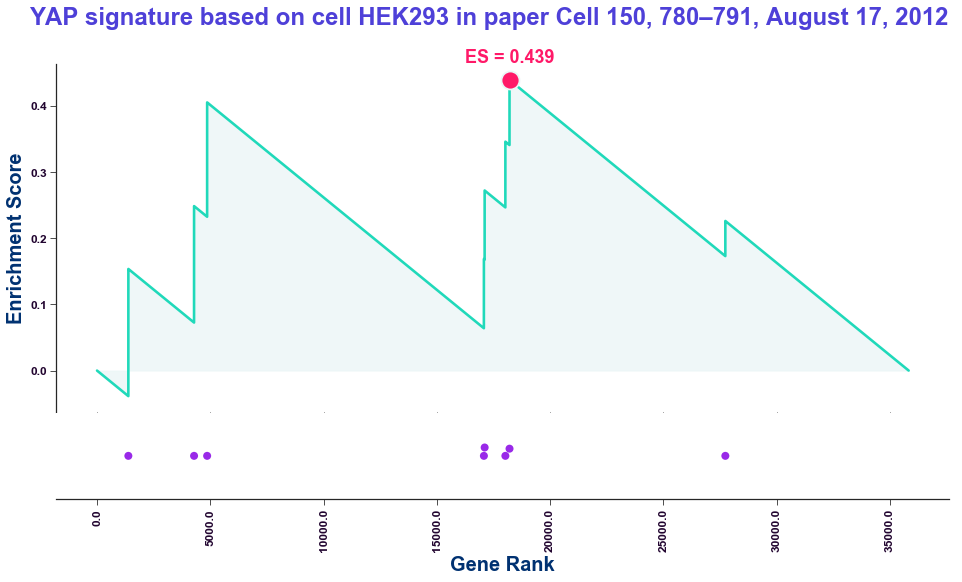

In [6]:
gene_set_score_p_value = gsea(
    gene_x_sample, ('C', ) * 3 + ('VS', ) * 3,
    gene_sets,
    method='log_ratio',
    normalization_method='rank',
    power=1,
    statistic='ks',
    n_permutation=3,
    permuting='phenotype',
    directory_path='gsea_result')

gene_set_score_p_value